# IBM Data Science Certificate Capstone Project: Car Accident Severity Classification

# Introduction and Business Understanding

According to the National Highway Traffic Safety Administration [1], more than 6 million car accidents have occurred across the United States per year resulting in the death of more than 36,500 people and injuring more than 2.7 million people.  These figures are astounding when you consider than many accidents could be prevented through improved driver safety or road conditions.  This project aims to address possible ways to detect the severity of a crash using data from Seattle, WA.  By analyzing several factors in the crashes, we may be able to better predict the likelihood of a severe crash that could cause injury or result in a fatality.  Using machine learning techniques, we can model multiple crash factors to see which may have the greatest ability to predict accident severity.  The benefit of this modelling could result in improved road conditions, training and education, or even distribution of police and safety teams during adverse conditions.  Police departments, insurance agencies, and drivers could all benefit from this type of analysis to better understand how conditions impact accident severity in the hopes of reducing not only accidents, but also the severity of accidents. 

# Data Understanding

The data in this project specifically addresses crashed in Seattle, WA from 2004 to present [2] but could be modelled using similar data form other US cities.  Coursera provided the data via a .csv file which then I translated into a pandas dataframe in Python.  For the project, I will use Watson Studio to create Jupyter Notebook where I will perform the data cleanup and modelling.  The data cleanup will include reviewing the data cells that have the greatest impact on the severity of reported car accidents (where Severity Code 1 = property damage, and Severity Code 2 = injury to a person).  For example, I may find that weather conditions and location are the most relevant factors – or perhaps it will be the light conditions and day of the week that have the greatest impact.  I will need to remove some of the 38 columns and 194,673 rows to improve modelling after factoring in their relevance to the overall crash severity, but during the data preparation stage, I will explain these steps.  Removing unnecessary cells will allow for a simpler dataframe which can then be used to train the models.  At the onset of the project, I would like to use classifier regression algorithms such as K-Nearest Neighbor, Decision Tree, and Support Vector Machine to help determine which model may be the best predictor (via F1 scores and Jaccard index).

# Data Preparation 

My expectation for date preparation will include reviewing the data populated across the 38 different columns.  As with any data set, not all the columns will yield useful data with which to address the problem – creating a classification system to determine if select criteria can determine the severity of an accident.  In this particular data set, there appear to be several codes that may be quite useful to the local Seattle authorities, but not useful for determining categories that contribute to the severity of car accidents (where Severity Code 1 = property damage, and Severity Code 2 = injury to a person).  Some of the most interesting data appears to be the address type (“ADDRTYPE”), location (“LOCATION”), weather (“WEATHER”), road conditions (“ROADCOND”), and light conditions (“LIGHTCOND”), junction type (“JUNCTIONTYPE”), and collision type (“COLLISIONTYPE”).  The important thing during data preparation is to ensure that the “best” categories are included.  What I will perform in this step is to review the shape of the dataframe and determine if there are pattens that emerge.  For example, do wet conditions or dark light conditions contribute to more severe accidents than the alternatives such as dry road conditions or daylight conditions?  It is important to also evaluate there data should be removed if it does not contribute measurably – for example could several categories if road conditions be grouped together to simplify modelling?  Data preparation allows a Data Scientist to create  dataframe that can be easily applied to multiple data regression or classification algorithms to test accuracy.

In [213]:
#Import Libraries for future analysis
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [509]:
#Import data set from Coursera
! wget https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-22 19:38:25--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv.6’

100%[======================================>] 73,917,638  42.8MB/s   in 1.6s   

2020-09-22 19:38:27 (42.8 MB/s) - ‘Data-Collisions.csv.6’ saved [73917638/73917638]



In [510]:
df_collision = pd.read_csv('Data-Collisions.csv')
df_collision.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [511]:
#Dataframe shape to determine number or rows and columns
df_collision.shape

(194673, 38)

In [512]:
#Dataframe details to determine types of data (integers, floats, objects)
df_collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [457]:
#Install Folium for preparation of choropleth map (maybe!!!)
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: - ^C
failed

CondaError: KeyboardInterrupt

Folium installed and imported!


In [458]:
#Seattle latitude and longitude values
latitude = 47.6062
longitude = -122.43321

In [459]:
#Create map 
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

seattle_map

In [460]:
#Let's create a simplified map of where accidents occur in Seattle
df_accident = pd.read_csv('Data-Collisions.csv')

df_map = df_accident[['SEVERITYCODE', 'LOCATION']]

df_map.head()

,SEVERITYCODE,LOCATION
0,2,5TH AVE NE AND NE 103RD ST
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST
4,2,SWIFT AVE S AND SWIFT AV OFF RP


In [461]:
df_map.shape

(194673, 2)

In [462]:
#Drop NAN rows
df_map=df_map.dropna(subset = ['LOCATION'])

In [463]:
#Confirm size of smaller dataframe minus the removed rows
df_map.shape

(191996, 2)

In [464]:
#In order to get an idea where accidents occured in Seattle, this command will simplify the dataframe and select 
#the first 10 (just for illustration purposes) in a smaller dataframe
limit = 10
df_map = df_collision.iloc[0:limit, :]

In [465]:
#Create a feature group for the accidents in the dataframe
accidents = folium.map.FeatureGroup()

#loop through the 10 car accidents and add each to the accidents feature group on the choropleth map
for lat, lng, in zip(df_map.Y, df_map.X): accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
#add accidents to map
seattle_map.add_child(accidents)

In [513]:
#Let's look at the dataframe again
df_collision.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [514]:
df_collision.shape

(194673, 38)

In [515]:
#Let's remove some of the extra columns that have codes of data (not removing key fields which may have an impact on the accidents)

drop_col_list = ['X','Y','OBJECTID','INCKEY','COLDETKEY','INTKEY','SEGLANEKEY','ST_COLCODE','SDOT_COLCODE','CROSSWALKKEY','HITPARKEDCAR','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','INATTENTIONIND','INCDTTM','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLDESC']
df_collision = df_collision.drop(labels =drop_col_list, axis= 1)
df_collision.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN
1,1,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,NaN
2,1,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,NaN
3,1,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,NaN
4,2,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,NaN


In [516]:
#In looking at the dataframe, it looks like we can also drop "report number" and "STATUS" since they look like codes. 
#We can also remove "speeding" since there is not consistent data included (which is surprising)

drop_col_list = ['REPORTNO','STATUS','SPEEDING']
df_collision = df_collision.drop(labels =drop_col_list, axis= 1)
df_collision.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight


In [517]:
#Let's see if we can categorize the type of data we have
df_collision['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

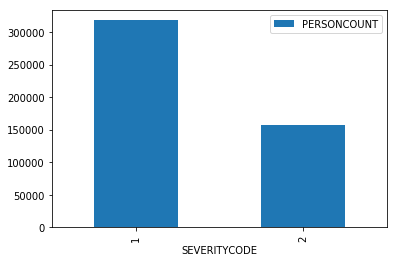

In [518]:
#Let's look at the count of people impacted in the accidents with each severity code
df_collision[['SEVERITYCODE', 'PERSONCOUNT']].groupby('SEVERITYCODE').sum().plot(kind='bar')

In [519]:
#There are more than twice as many severity 1 accidents than there are severity 2 accidents -- which is good since severity 2 are the most severe

#Now we need to "balance" the data - thank you to the classmates who referenced an article on "Elite Data Science":
#"https://elitedatascience.com/imbalanced-classes" for guidance on how to downsample the data


from sklearn.utils import resample
df_collision_max = df_collision[df_collision.SEVERITYCODE ==1]
df_collision_min = df_collision[df_collision.SEVERITYCODE ==2]
df_collision_max_ds = resample(df_collision_max, 
                               replace = False,    #sample with replacement
                               n_samples= 58188,   #to match minority class
                               random_state = 123  #reproducible results
                              )

df_collision_balance = pd.concat([df_collision_max_ds,df_collision_min])
df_collision_balance.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

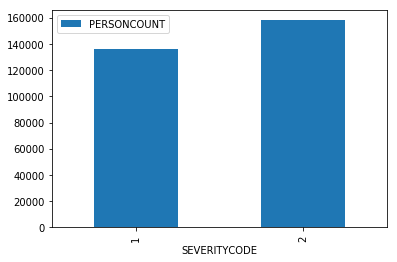

In [520]:
#Let's check via a bar graph again to see if the data is balanced -- well this is very intersting and possibly could skew the data models 
#downstream since now there are more people impacted in the accidents with severity 2
df_collision_balance[['SEVERITYCODE', 'PERSONCOUNT']].groupby('SEVERITYCODE').sum().plot(kind='bar')

In [521]:
#Let's see if we can find patterns in the data

df_collision_balance['PERSONCOUNT'].value_counts()

2     64659
3     22848
4      9936
1      7487
5      4519
0      3339
6      1932
7       830
8       396
9       167
10       94
11       46
12       27
13       15
14       13
17        9
15        8
16        5
18        4
19        4
47        3
44        3
34        3
25        3
20        2
28        2
37        2
29        2
30        2
27        2
24        2
22        2
26        1
53        1
31        1
32        1
36        1
23        1
39        1
81        1
48        1
54        1
Name: PERSONCOUNT, dtype: int64

In [522]:
df_collision_balance['PEDCOUNT'].value_counts()

0    109831
1      6299
2       218
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [523]:
df_collision_balance['PEDCYLCOUNT'].value_counts()

0    111300
1      5033
2        43
Name: PEDCYLCOUNT, dtype: int64

In [524]:
df_collision_balance['VEHCOUNT'].value_counts()

2     83522
1     19068
3      8746
0      2893
4      1639
5       363
6        93
7        32
8         7
9         6
11        5
10        2
Name: VEHCOUNT, dtype: int64

In [525]:
#Interestingly, most accidents involved 2 or 3 people (75%) with almost no pedestrians or cyclists involved
#I will remove Pedcount and Pedcyclecount

#Also interesting is that most car accidents invovled only 1 or 2 cars (88%)

In [526]:
df_collision_balance['WEATHER'].value_counts()

Clear                       67946
Raining                     20584
Overcast                    16834
Unknown                      6851
Snowing                       474
Other                         406
Fog/Smog/Smoke                355
Sleet/Hail/Freezing Rain       63
Blowing Sand/Dirt              30
Severe Crosswind               13
Partly Cloudy                   4
Name: WEATHER, dtype: int64

In [527]:
df_collision_balance['ROADCOND'].value_counts()

Dry               76000
Wet               29374
Unknown            6806
Ice                 678
Snow/Slush          528
Other                83
Standing Water       57
Sand/Mud/Dirt        47
Oil                  39
Name: ROADCOND, dtype: int64

In [528]:
#Let's see if any initial patterns emerge among severity type 1 and 2 crashes correlated with weather

In [529]:
df_collision_balance['LIGHTCOND'].value_counts()

Daylight                    71503
Dark - Street Lights On     29133
Unknown                      6062
Dusk                         3592
Dawn                         1535
Dark - No Street Lights       866
Dark - Street Lights Off      703
Other                         127
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

In [530]:
df_collision_balance['ADDRTYPE'].value_counts()

Block           71321
Intersection    43750
Alley             383
Name: ADDRTYPE, dtype: int64

In [531]:
df_collision_balance['COLLISIONTYPE'].value_counts()

Rear Ended    22904
Angles        22558
Parked Car    21969
Other         13668
Sideswipe      9403
Left Turn      8937
Pedestrian     6229
Cycles         5009
Right Turn     1608
Head On        1381
Name: COLLISIONTYPE, dtype: int64

In [532]:
df_collision_balance['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              49349
At Intersection (intersection related)               42397
Mid-Block (but intersection related)                 13926
Driveway Junction                                     6402
At Intersection (but not related to intersection)     1268
Ramp Junction                                           94
Unknown                                                  3
Name: JUNCTIONTYPE, dtype: int64

In [533]:
df_collision_balance['SEVERITYDESC'].value_counts()

Injury Collision                  58188
Property Damage Only Collision    58188
Name: SEVERITYDESC, dtype: int64

In [535]:
#It is clear that within these 4 categories of weather, road conditions, light conditions, and address types, there 
#are very few primary reasons (ie: 60% of weather was dry; 65% of roads were dry; 61% of light was daylight), so those will be
#good categories to model (as an aside, I find it quite surprising that more accidents didnt occur on wet roads in the dark!)

In [534]:
#In order to create the models, it is important to put the fields into numerical form, so let's start creating a simplified
#set of tables with numerical codes to replace the highest value categories (ie: I will have 1, 2, or 3 for the primary values
#and an "other" category as a 3 or 4 when necessary so we can reduce the overall counts)

#It is also important to ensure we have numerical values to replace the objects in several of these categories

In [536]:
df_collision_balance.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
25055,1,Intersection,33RD AVE NE AND NE 125TH ST,Property Damage Only Collision,Angles,2,0,0,2,2005/01/22 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Dark - Street Lights On
65280,1,Intersection,8TH AVE AND SPRING ST,Property Damage Only Collision,Angles,2,0,0,2,2008/08/22 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight
86292,1,Intersection,LAKE CITY WAY NE AND NE 145TH ST,Property Damage Only Collision,Angles,2,0,0,2,2010/11/19 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,Unknown,Unknown,Unknown
155111,1,Block,ALASKAN WY VI NB BETWEEN SENECA ST OFF RP AND ...,Property Damage Only Collision,Sideswipe,2,0,0,2,2016/06/17 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight
64598,1,Block,ROY ST BETWEEN 9TH AVE N AND VALLEY ST,Property Damage Only Collision,Head On,3,0,0,2,2008/03/09 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight


In [537]:
#Now let's simplify the dataframe by removing columns that don't seem to have significant outcome

drop_col_list = ['LOCATION','SEVERITYDESC','INCDATE','SDOT_COLDESC','UNDERINFL','PEDCOUNT','PEDCYLCOUNT']
df_collision_balance = df_collision_balance.drop(labels =drop_col_list, axis= 1)
df_collision_balance.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
25055,1,Intersection,Angles,2,2,At Intersection (intersection related),Raining,Wet,Dark - Street Lights On
65280,1,Intersection,Angles,2,2,At Intersection (intersection related),Clear,Dry,Daylight
86292,1,Intersection,Angles,2,2,At Intersection (intersection related),Unknown,Unknown,Unknown
155111,1,Block,Sideswipe,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight
64598,1,Block,Head On,3,2,Mid-Block (not related to intersection),Clear,Dry,Daylight


In [538]:
#Now let's drop all the rows with no values (NaN) -- I am also dropping the Pedestrian Cycle counts since most of hte values are zero
df_collision_balance=df_collision_balance.dropna(subset = ['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','COLLISIONTYPE', 'JUNCTIONTYPE'])
df_collision_balance.shape

(110433, 9)

In [539]:
#Replace text with numeric values

#Based on my earlier findings, 60% of weather is clear with 18% raining and 14% overcast, so I will normalize the data to clear, raining, overcast, and other (set as 1, 2, 3, 4)
df_collision_balance['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Fog/Smog/Smoke','Snowing','Other','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4],inplace=True)

#Based on my earlier findings, 65% of roads were dry with 25% wet, and the rest is other, so I will normalize the data to dry, wet, and other (set as 1, 2, 3)
df_collision_balance['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'], value=[1, 2, 3, 3, 3, 3, 3, 3, 3],inplace=True)

#Based on my earlier findings, 61% of light is day with 26% in the dark, and the rest is other, so I will normalize the data to daylight, dark (all types), other (set as 1, 2, 3)
df_collision_balance['LIGHTCOND'].replace(to_replace=
['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'],value=[1, 2, 3, 3, 3, 2, 2, 3, 2], inplace=True)

#Based on my earlier findings, 62% of locations were at blocks, then38% at intersections, so I will use 1, 2, 3
df_collision_balance['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[1, 2, 3], inplace=True)

#This was a new add in my second round of data cleaning -- looks like it helped to include Collision Type although I skipped it inially since there was no single leader!!
df_collision_balance['COLLISIONTYPE'].replace(to_replace=['Rear Ended','Angles','Parked Car','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'], value = [1,2,3,4,4,4,4,4,4,4], inplace=True)

#This was a new add in my second round of data cleaning -- looks like it helped to include Junction Type although I skipped it inially since there was no single leader!
df_collision_balance['JUNCTIONTYPE'].replace(to_replace=['Mid-Block (not related to intersection)','At Intersection (intersection related)','Mid-Block (but intersection related)','Driveway Junction','At Intersection (but not related to intersection)','Ramp Junction','Unknown'], value = [1,2,3,4,4,4,4], inplace=True)


In [540]:
df_collision_balance.shape

(110433, 9)

In [541]:
df_collision_balance.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
25055,1,2,2,2,2,2,2,2,2
65280,1,2,2,2,2,2,1,1,1
86292,1,2,2,2,2,2,4,3,3
155111,1,1,4,2,2,1,1,1,1
64598,1,1,4,3,2,1,1,1,1


In [542]:
#Let's build a couple of ADDRTYPE bar charts to see if there is  a significant trend we notice in severity

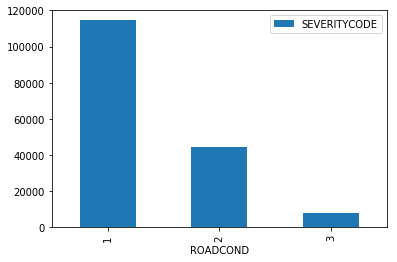

In [543]:
df_collision_balance[['SEVERITYCODE', 'ROADCOND']].groupby('ROADCOND').sum().plot(kind='bar')

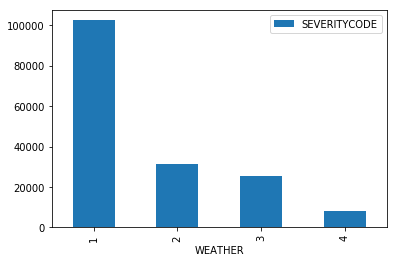

In [578]:
df_collision_balance[['SEVERITYCODE', 'WEATHER']].groupby('WEATHER').sum().plot(kind='bar')

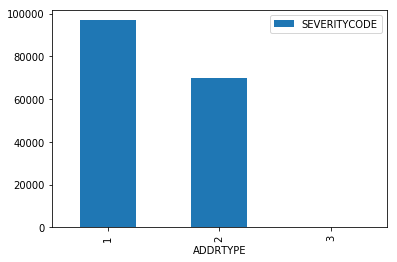

In [544]:
df_collision_balance[['SEVERITYCODE', 'ADDRTYPE']].groupby('ADDRTYPE').sum().plot(kind='bar')

In [545]:
#Now we can start to model the data based on the dataframe above!!!

# Data Modelling and Evaluation

Throughout the data modelling phase, a data scientist will perform multiple machine learning techniques.  In order to run the models, I will be using the Severity Code as our target variable (Y) and multiple data categories as our independent variables (X).  The techniques I intend to perform include K-Nearest Neighbors, Decision Tree, and Support Vector Machine.  K-Nearest Neighbors technique evaluates a pattern in the neighboring datapoints to see if a behavior by similar data points will yield a similar result for a new data point. Sometimes, it is not always the “nearest” neighbor (K=1) that yield the best results, so there are some creative ways to address the algorithm by using the technique to count the best approximator of neighbors.  A Decision Tree algorithm looks at all the options for a particular set of attributes and split data until it finds the most comparable set of conditions.  There are multiple ways to set up a decision tree algorithm, but the ideal way is to calculate the lowest levels of entropy in order to determine the purest tree branch.  By reducing entropy, you can develop a clearer set of patterns from which to model the data.  And as a final example, Support Vector Machine classification allows for data to be distinctly classified by a “Separator” in order to determine a prediction.  Support Vector Modelling tends to have quite high accuracy scores.  In fact, scores such as F1 and Jaccard index scores are what I will use to evaluate these models to determine which one has the highest accuracy that might determine the severity of a car accident in the Seattle area.  I am quite interested to see if patterns emerge easily or if there are other data cleaning steps needed.  In most projects, data scientists will revisit data preparation almost in a loop format to ensure the current inputs yield the best results.  

In [546]:
#Let's build the testing / training dataframe and define X features and with target Y variable (Severity)

In [548]:
df_model = df_collision_balance[['PERSONCOUNT','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','JUNCTIONTYPE','COLLISIONTYPE']]
X = df_model
X[0:5]

,PERSONCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,JUNCTIONTYPE,COLLISIONTYPE
25055,2,2,2,2,2,2,2,2
65280,2,2,1,1,1,2,2,2
86292,2,2,4,3,3,2,2,2
155111,2,2,1,1,1,1,1,4
64598,3,2,1,1,1,1,1,4


In [549]:
y = df_collision_balance['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [550]:
#Now we can create the train and test sets

In [551]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.38403691,  0.07957469,  0.35718367,  1.03354416,  0.83723578,
         1.24877769,  0.18951666, -0.67660317],
       [-0.38403691,  0.07957469, -0.70679453, -0.6409575 , -0.69257094,
         1.24877769,  0.18951666, -0.67660317],
       [-0.38403691,  0.07957469,  2.48514007,  2.70804582,  2.3670425 ,
         1.24877769,  0.18951666, -0.67660317],
       [-0.38403691,  0.07957469, -0.70679453, -0.6409575 , -0.69257094,
        -0.79388471, -0.92603652,  1.01702115],
       [ 0.31026999,  0.07957469, -0.70679453, -0.6409575 , -0.69257094,
        -0.79388471, -0.92603652,  1.01702115]])

In [552]:
#import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (77303, 8) (77303,)
Test set: (33130, 8) (33130,)


In [553]:
#Now we can begin with Classification Models

# K-Nearest Neighbors

In [554]:
from sklearn.neighbors import KNeighborsClassifier

#Train Model and Predict with an example of k=4 (as we completed in multiple labs) 
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [555]:
yhat_knn = neigh.predict(X_test)

In [556]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.6587842645175478
Test set Accuracy:  0.6344099003923936


In [557]:
#Evaluate multiple K values

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.6344099, 0.6344099, 0.6344099, 0.6344099, 0.6344099, 0.6344099,
       0.6344099, 0.6344099, 0.6344099])

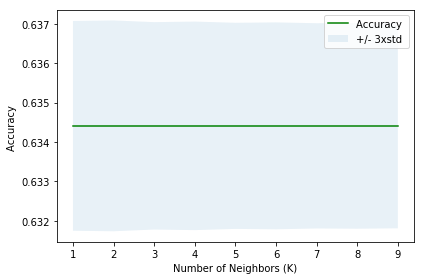

The best accuracy was with 0.6344099003923936 with k= 1


In [558]:
#Plot K values

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [559]:
#Run analysis again with K=1

k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [560]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [574]:
#Compute the F1 Jaccard evaluation scores for K-Nearest Neighbors

#F1_score
f1_score_knn = f1_score(y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

#Jaccard
jaccard_knn = jaccard_similarity_score(y_test, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)

KNN F1-score:  0.6293129028137348
KNN Jaccard index:  0.6344099003923936


## Decision Tree

In [562]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [563]:
#Create Train and Test Sets

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

#Print Train Set
print('Train set:', X_trainset.shape, y_trainset.shape)

#Print Test Set
print('Test set:', X_testset.shape, y_testset.shape)

Train set: (77303, 8) (77303,)
Test set: (33130, 8) (33130,)


In [564]:
#Run the Decsision Tree Analysis

D_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

D_Tree.fit(X_trainset,y_trainset)

yhat_dt = D_Tree.predict(X_testset)

D_Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [565]:
yhat_dt = D_Tree.predict(X_test)
yhat_dt

array([2, 2, 1, ..., 2, 1, 1])

In [575]:
#Compute the F1 Jaccard evaluation scores for the Decision Tree

#F1_score
f1_score_dt = f1_score(y_test, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)

#Jaccard
jaccard_dt = jaccard_similarity_score(y_test, yhat_dt)
print("DT Jaccard index: ", jaccard_dt)

DT F1-score:  0.6842200602981601
DT Jaccard index:  0.6886809538182915


## Support Vector Machine

In [570]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [571]:
#Create Train and Test Sets

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (77303, 8) (77303,)
Test set: (33130, 8) (33130,)


In [572]:
yhat_svm = clf.predict(X_test)
yhat_svm [0:5]

array([2, 2, 1, 2, 2])

In [576]:
#Compute the F1 Jaccard evaluation scores for Support Vector Machine

#F1_score
f1_score_svm = f1_score(y_test, yhat_svm, average='weighted')
print("SVM F1-score: ", f1_score_svm)

#Jaccard
jaccard_svm = jaccard_similarity_score(y_test, yhat_svm)
print("SVM Jaccard index: ", jaccard_svm)

SVM F1-score:  0.6901997580579191
SVM Jaccard index:  0.6919408391186236


# Data Conclusions

After redoing the analysis and redeveloping the models, I was able to produce results that would indicate that there is an opportunity to predict the severity of a car accident to closer to 69%.  The Support Vector Machine classification produced the highest set of scores.  In my first analysis, the F1 and Jaccard scores were closer to 60% across all three classification models (in the first set of data, I only modelled people counts, weather, light conditions, address types).  After seeing F1 and Jaccard scores in the 60% range, I decided I needed to reevaluate the data fields included.  By adding vehicle counts, junction types, and collision types to the model test / training set, I was able to produce much better F1 and Jaccard scores from 63-69%. While 69% isn’t a high score, it did strongly show a correlation among the data categories.  In order to improve the model further, I would think new data types would need to be introduced.  Perhaps data fields such as the age or a driver or the type of vehicle could have a larger impact on the crash severity.  The table below gives a summary of all the findings.  

In [577]:
#Create a F1-score list
F1_score = [f1_score_knn,f1_score_dt,f1_score_svm]

#Create a Jaccard list
Jaccard_score = [jaccard_knn,jaccard_dt,jaccard_svm]

#Create Formatted Table for results
df_table = pd.DataFrame(F1_score, index=['K-Nearest Neighbors','Decision Tree','Support Vector Machine',])
df_table.columns = ['F1-score']
df_table.insert(loc=1, column='Jaccard', value=Jaccard_score)
df_table.columns.name = 'Classification Algorithm'
df_table

Classification Algorithm,F1-score,Jaccard
K-Nearest Neighbors,0.629313,0.634410
Decision Tree,0.684220,0.688681
Support Vector Machine,0.690200,0.691941
